<a href="https://colab.research.google.com/github/plaban1981/DEEP-LEARNING-/blob/master/news_headlines_dataset_for_sarcasm_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Context

Past studies in Sarcasm Detection mostly make use of Twitter datasets collected using hashtag based supervision but such datasets are noisy in terms of labels and language. Furthermore, many tweets are replies to other tweets and detecting sarcasm in these requires the availability of contextual tweets.

To overcome the limitations related to noise in Twitter datasets, this News Headlines dataset for Sarcasm Detection is collected from two news website. TheOnion aims at producing sarcastic versions of current events and we collected all the headlines from News in Brief and News in Photos categories (which are sarcastic). We collect real (and non-sarcastic) news headlines from HuffPost.

This new dataset has following advantages over the existing Twitter datasets:

Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and informal usage. This reduces the sparsity and also increases the chance of finding pre-trained embeddings.

Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with much less noise as compared to Twitter datasets.

Unlike tweets which are replies to other tweets, the news headlines we obtained are self-contained. This would help us in teasing apart the real sarcastic elements.

#Content

Each record consists of three attributes:

* is_sarcastic: 1 if the record is sarcastic otherwise 0

* headline: the headline of the news article

* article_link: link to the original news article. Useful in collecting supplementary data

https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection/home

In [4]:
import tensorflow as tf
print(tf.__version__)

1.14.0


#Import data

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2019-07-28 13:39:03--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 2a00:1450:400c:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.02s   

2019-07-28 13:39:03 (214 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [8]:
!pip install tensorflow==2.0.0-beta0

     |████████████████████████████████| 87.9MB 32.7MB/s 
     |████████████████████████████████| 501kB 37.3MB/s 
     |████████████████████████████████| 3.1MB 28.8MB/s 
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


## Import Libraries

In [0]:
import csv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
#Stopwords list from https://github.com/Yoast/YoastSEO.js/blob/develop/src/config/stopwords.js
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]


In [0]:
sentences = []
labels = []
with open("/tmp/bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        sentence = ' '.join([word for word in sentence.split() if word not in stopwords])
        sentences.append(sentence)

In [6]:
print(len(sentences))
print(sentences[0])

2225
tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable sa

#Tokenization

In [7]:
tokenizer = Tokenizer(oov_token="<oov>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(len(word_index))
# Expected output
# 29714

29714


##Padding

In [8]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences,padding='post')
print(sequences)
print(padded[0])
print(padded.shape)

[[96, 176, 1157, 1220, 54, 1122, 742, 5211, 85, 1074, 4267, 147, 184, 4127, 1344, 1311, 1595, 47, 9, 949, 96, 4, 6516, 329, 92, 23, 17, 140, 3128, 1330, 2519, 576, 419, 1277, 72, 2963, 3046, 1755, 10, 894, 4, 755, 12, 954, 19513, 11, 656, 1578, 1053, 414, 4, 1999, 1220, 778, 54, 502, 1497, 2114, 1652, 135, 333, 123, 2744, 817, 5212, 1088, 609, 12, 4413, 4128, 894, 2580, 147, 351, 184, 4127, 8812, 5798, 44, 73, 3218, 31, 11, 2, 5473, 22, 2, 1397, 145, 454, 9, 138, 1398, 82, 4598, 488, 5213, 96, 1053, 87, 6517, 83, 2115, 63, 8813, 96, 8, 1123, 634, 85, 1074, 96, 1970, 148, 159, 420, 11, 2879, 46, 56, 149, 1221, 85, 1074, 4414, 5, 13, 9, 488, 5213, 3129, 13, 8, 2693, 6967, 412, 1097, 8814, 1376, 616, 1469, 2079, 14968, 756, 11, 502, 1497, 2114, 135, 1918, 410, 895, 2080, 1618, 43, 1819, 2581, 4995, 5474, 2520, 251, 11, 2635, 83, 818, 8, 1089, 1133, 149, 797, 577, 8815, 136, 31, 1397, 1820, 445, 4, 90, 955, 117, 23, 17, 22, 3397, 19514, 42, 1453, 2, 12593, 28, 42, 99, 362, 2392, 42, 24, 46

In [9]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')
print(padded[0])
print(padded.shape)

# Expected output
# [  96  176 1158 ...    0    0    0]
# (2225, 2442)

[  96  176 1157 ...    0    0    0]
(2225, 2438)


# Label tokenization

In [10]:

set(labels)

{'business', 'entertainment', 'politics', 'sport', 'tech'}

In [11]:
label_tokenize = Tokenizer()
label_tokenize.fit_on_texts(labels)
label_word_index = label_tokenize.word_index
label_seq = label_tokenize.texts_to_sequences(labels)
print(label_seq)
print(label_word_index)

[[4], [2], [1], [1], [5], [3], [3], [1], [1], [5], [5], [2], [2], [3], [1], [2], [3], [1], [2], [4], [4], [4], [1], [1], [4], [1], [5], [4], [3], [5], [3], [4], [5], [5], [2], [3], [4], [5], [3], [2], [3], [1], [2], [1], [4], [5], [3], [3], [3], [2], [1], [3], [2], [2], [1], [3], [2], [1], [1], [2], [2], [1], [2], [1], [2], [4], [2], [5], [4], [2], [3], [2], [3], [1], [2], [4], [2], [1], [1], [2], [2], [1], [3], [2], [5], [3], [3], [2], [5], [2], [1], [1], [3], [1], [3], [1], [2], [1], [2], [5], [5], [1], [2], [3], [3], [4], [1], [5], [1], [4], [2], [5], [1], [5], [1], [5], [5], [3], [1], [1], [5], [3], [2], [4], [2], [2], [4], [1], [3], [1], [4], [5], [1], [2], [2], [4], [5], [4], [1], [2], [2], [2], [4], [1], [4], [2], [1], [5], [1], [4], [1], [4], [3], [2], [4], [5], [1], [2], [3], [2], [5], [3], [3], [5], [3], [2], [5], [3], [3], [5], [3], [1], [2], [3], [3], [2], [5], [1], [2], [2], [1], [4], [1], [4], [4], [1], [2], [1], [3], [5], [3], [2], [3], [2], [4], [3], [5], [3], [4], [2],

#Large Movie Review Dataset

This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well. Raw text and already processed bag of words formats are provided. See the README file contained in the release for more details.

In [13]:
# NOTE: PLEASE MAKE SURE YOU ARE RUNNING THIS IN A PYTHON3 ENVIRONMENT

import tensorflow as tf
print(tf.__version__)

# This is needed for the iterator over the data
# But not necessary if you have TF 2.0 installed
#!pip install tensorflow==2.0.0-beta0


#tf.enable_eager_execution()

# !pip install -q tensorflow-datasets

2.0.0-beta0


In [14]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

W0728 13:42:20.329852 140558337832832 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_datasets/core/file_format_adapter.py:209: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/0.1.0. Subsequent calls will reuse this data.


W0728 13:43:14.443222 140558337832832 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


In [0]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [0]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [17]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

b oh yeah jenna jameson did it again yeah baby this movie rocks it was one of the 1st movies i saw of her and i have to say i feel in love with her she was great in this move br br her performance was outstanding and what i liked the most was the scenery and the wardrobe it was amazing you can tell that they put a lot into the movie the girls cloth were amazing br br i hope this comment helps and u can buy the movie the storyline is awesome is very unique and i'm sure u are going to like it jenna amazed us once more and no wonder the movie won so many
b"Oh yeah! Jenna Jameson did it again! Yeah Baby! This movie rocks. It was one of the 1st movies i saw of her. And i have to say i feel in love with her, she was great in this move.<br /><br />Her performance was outstanding and what i liked the most was the scenery and the wardrobe it was amazing you can tell that they put a lot into the movie the girls cloth were amazing.<br /><br />I hope this comment helps and u can buy the movie, the

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 11526     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [26]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 5s 187us/sample - loss: 1.0733e-04 - accuracy: 1.0000 - val_loss: 0.8342 - val_accuracy: 0.8297
Epoch 2/10
25000/25000 [==============================] - 5s 197us/sample - loss: 6.5096e-05 - accuracy: 1.0000 - val_loss: 0.8665 - val_accuracy: 0.8294
Epoch 3/10
25000/25000 [==============================] - 5s 197us/sample - loss: 4.0791e-05 - accuracy: 1.0000 - val_loss: 0.9015 - val_accuracy: 0.8293
Epoch 4/10
25000/25000 [==============================] - 5s 186us/sample - loss: 2.5813e-05 - accuracy: 1.0000 - val_loss: 0.9280 - val_accuracy: 0.8300
Epoch 5/10
25000/25000 [==============================] - 5s 185us/sample - loss: 1.6070e-05 - accuracy: 1.0000 - val_loss: 0.9640 - val_accuracy: 0.8297
Epoch 6/10
25000/25000 [==============================] - 5s 185us/sample - loss: 1.0460e-05 - accuracy: 1.0000 - val_loss: 0.9928 - val_accuracy: 0.8293
Epoch 7/10
25000/25000 [==

In [29]:
history.history

{'accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'loss': [0.00010733429191168398,
  6.509592755348421e-05,
  4.079111946746707e-05,
  2.5812666020356117e-05,
  1.60702883976046e-05,
  1.0459509644570062e-05,
  6.424282346706605e-06,
  4.088852696295362e-06,
  2.616303671748028e-06,
  1.6558292558329413e-06],
 'val_accuracy': [0.82972,
  0.82936,
  0.82932,
  0.83,
  0.82972,
  0.82928,
  0.82956,
  0.82932,
  0.82932,
  0.82936],
 'val_loss': [0.8342187246680259,
  0.8664935716581345,
  0.9014770965652168,
  0.9279963271856309,
  0.964011899138689,
  0.9927599123620987,
  1.0216960501194001,
  1.05062584507823,
  1.0774874550819398,
  1.1036460776519776]}

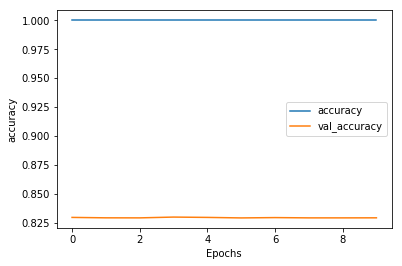

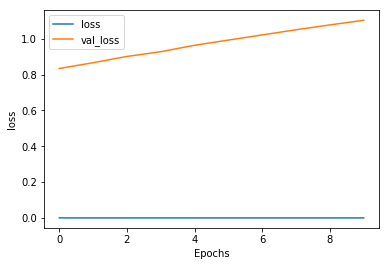

In [30]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, 'accuracy')
plot_graphs(history, "loss")

In [21]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [24]:
sentence = "I really think this is amazing. honest."
sequence = tokenizer.texts_to_sequences(sentence)
print(sequence)

[[11], [], [1430], [968], [4], [1537], [1537], [4739], [], [790], [2015], [11], [2921], [2190], [], [790], [2015], [11], [579], [], [11], [579], [], [4], [1783], [4], [4508], [11], [2921], [1277], [], [], [2015], [1005], [2921], [968], [579], [790], []]
